In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
sales=pd.read_csv('/content/drive/MyDrive/Data Analytics/sales_forecasting_dataset f.csv')

In [4]:
sales

,Date,Product_ID,Store_ID,Sales_Units,Price,Discount,Day_of_Week,Holiday,Weather
0,2023-01-01,P001,S001,96,500,0.01,Sunday,1,Sunny
1,2023-01-01,P001,S002,115,600,0.15,Sunday,1,Rainy
2,2023-01-01,P002,S001,78,500,0.01,Sunday,1,Cloudy
3,2023-01-01,P002,S002,89,500,0.11,Sunday,1,Rainy
4,2023-01-01,P003,S001,135,550,0.16,Sunday,1,Sunny
...,...,...,...,...,...,...,...,...,...
535,2023-03-31,P001,S002,66,600,0.14,Friday,0,Rainy
536,2023-03-31,P002,S001,135,700,0.12,Friday,0,Sunny
537,2023-03-31,P002,S002,58,550,0.14,Friday,0,Sunny
538,2023-03-31,P003,S001,120,550,0.03,Friday,0,Cloudy


In [5]:
sales.shape

(540, 9)

In [6]:
sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 540 entries, 0 to 539
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Date         540 non-null    object 
 1   Product_ID   540 non-null    object 
 2   Store_ID     540 non-null    object 
 3   Sales_Units  540 non-null    int64  
 4   Price        540 non-null    int64  
 5   Discount     540 non-null    float64
 6   Day_of_Week  540 non-null    object 
 7   Holiday      540 non-null    int64  
 8   Weather      540 non-null    object 
dtypes: float64(1), int64(3), object(5)
memory usage: 38.1+ KB


In [7]:
sales.describe()

,Sales_Units,Price,Discount,Holiday
count,540.000000,540.000000,540.000000,540.000000
mean,103.327778,595.648148,0.099204,0.166667
std,31.103603,77.078775,0.058496,0.373024
min,45.000000,500.000000,0.000000,0.000000
25%,76.000000,550.000000,0.050000,0.000000
50%,102.000000,600.000000,0.100000,0.000000
75%,127.000000,700.000000,0.150000,0.000000
max,175.000000,700.000000,0.200000,1.000000


In [26]:
sales.head()

,Date,Product_ID,Store_ID,Sales_Units,Price,Discount,Day_of_Week,Holiday,Weather
0,2023-01-01,P001,S001,96,500,0.01,3,1,2
1,2023-01-01,P001,S002,115,600,0.15,3,1,1
2,2023-01-01,P002,S001,78,500,0.01,3,1,0
3,2023-01-01,P002,S002,89,500,0.11,3,1,1
4,2023-01-01,P003,S001,135,550,0.16,3,1,2


In [27]:
sales.tail()

,Date,Product_ID,Store_ID,Sales_Units,Price,Discount,Day_of_Week,Holiday,Weather
535,2023-03-31,P001,S002,66,600,0.14,0,0,1
536,2023-03-31,P002,S001,135,700,0.12,0,0,2
537,2023-03-31,P002,S002,58,550,0.14,0,0,2
538,2023-03-31,P003,S001,120,550,0.03,0,0,0
539,2023-03-31,P003,S002,116,700,0.19,0,0,2


In [28]:
sales['Weather'].value_counts()

,count
Weather,
0,199
1,171
2,170


In [29]:
sales.groupby('Weather')['Sales_Units'].mean()

,Sales_Units
Weather,
0,102.924623
1,102.426901
2,104.705882


In [30]:
sales.groupby('Day_of_Week')['Sales_Units'].sum()

,Sales_Units
Day_of_Week,
0,8139
1,7591
2,7563
3,8066
4,7697
5,8519
6,8222


<Axes: xlabel='Sales_Units', ylabel='Day_of_Week'>

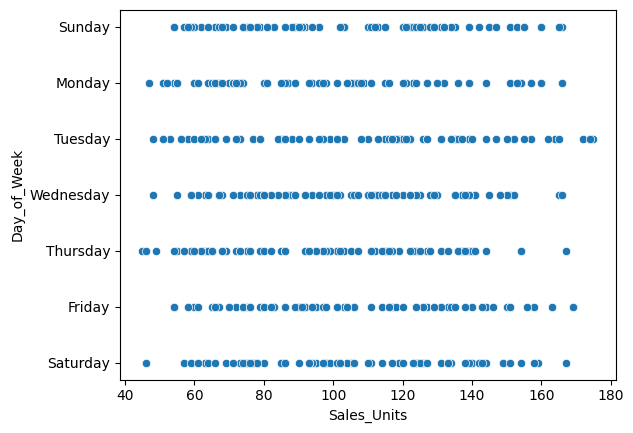

In [8]:
sns.scatterplot(x=sales['Sales_Units'],y=sales['Day_of_Week'])

In [9]:
sales.columns

Index(['Date', 'Product_ID', 'Store_ID', 'Sales_Units', 'Price', 'Discount',
       'Day_of_Week', 'Holiday', 'Weather'],
      dtype='object')

In [10]:
sales.isnull().sum()

,0
Date,0
Product_ID,0
Store_ID,0
Sales_Units,0
Price,0
Discount,0
Day_of_Week,0
Holiday,0
Weather,0


In [11]:
sales['Day_of_Week']=sales['Day_of_Week'].astype('category')
sales['Day_of_Week']=sales['Day_of_Week'].cat.codes

In [12]:
sales

,Date,Product_ID,Store_ID,Sales_Units,Price,Discount,Day_of_Week,Holiday,Weather
0,2023-01-01,P001,S001,96,500,0.01,3,1,Sunny
1,2023-01-01,P001,S002,115,600,0.15,3,1,Rainy
2,2023-01-01,P002,S001,78,500,0.01,3,1,Cloudy
3,2023-01-01,P002,S002,89,500,0.11,3,1,Rainy
4,2023-01-01,P003,S001,135,550,0.16,3,1,Sunny
...,...,...,...,...,...,...,...,...,...
535,2023-03-31,P001,S002,66,600,0.14,0,0,Rainy
536,2023-03-31,P002,S001,135,700,0.12,0,0,Sunny
537,2023-03-31,P002,S002,58,550,0.14,0,0,Sunny
538,2023-03-31,P003,S001,120,550,0.03,0,0,Cloudy


In [13]:
sales.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 540 entries, 0 to 539
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Date         540 non-null    object 
 1   Product_ID   540 non-null    object 
 2   Store_ID     540 non-null    object 
 3   Sales_Units  540 non-null    int64  
 4   Price        540 non-null    int64  
 5   Discount     540 non-null    float64
 6   Day_of_Week  540 non-null    int8   
 7   Holiday      540 non-null    int64  
 8   Weather      540 non-null    object 
dtypes: float64(1), int64(3), int8(1), object(4)
memory usage: 34.4+ KB


In [14]:
sales['Weather']=sales['Weather'].astype('category')
sales['Weather']=sales['Weather'].cat.codes

In [15]:
sales

,Date,Product_ID,Store_ID,Sales_Units,Price,Discount,Day_of_Week,Holiday,Weather
0,2023-01-01,P001,S001,96,500,0.01,3,1,2
1,2023-01-01,P001,S002,115,600,0.15,3,1,1
2,2023-01-01,P002,S001,78,500,0.01,3,1,0
3,2023-01-01,P002,S002,89,500,0.11,3,1,1
4,2023-01-01,P003,S001,135,550,0.16,3,1,2
...,...,...,...,...,...,...,...,...,...
535,2023-03-31,P001,S002,66,600,0.14,0,0,1
536,2023-03-31,P002,S001,135,700,0.12,0,0,2
537,2023-03-31,P002,S002,58,550,0.14,0,0,2
538,2023-03-31,P003,S001,120,550,0.03,0,0,0


In [19]:
sales_by_weather = sales.groupby('Weather')['Sales_Units'].sum()

In [20]:
sales_by_weather

,Sales_Units
Weather,
0,20482
1,17515
2,17800


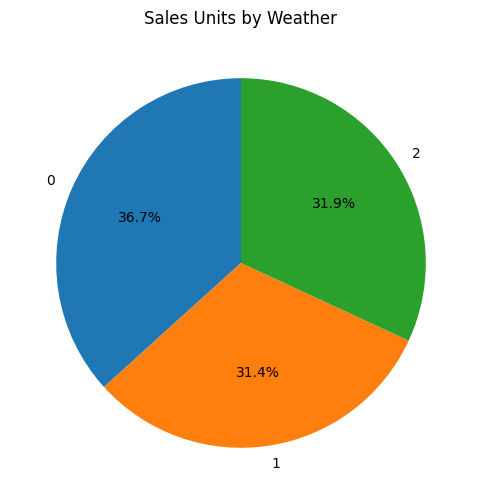

In [21]:
plt.figure(figsize=(6,6))
plt.pie(
    sales_by_weather,
    labels=sales_by_weather.index,
    autopct='%1.1f%%',
    startangle=90
)
plt.title("Sales Units by Weather")
plt.show()

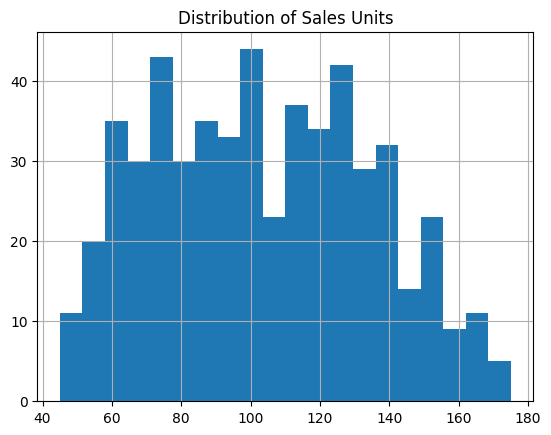

In [31]:
sales['Sales_Units'].hist(bins=20)
plt.title("Distribution of Sales Units")
plt.show()

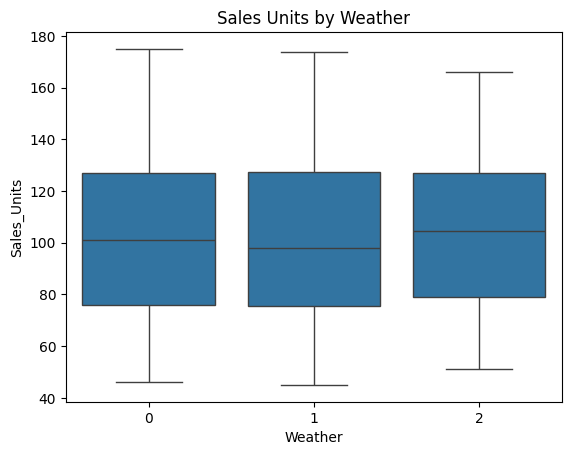

In [32]:
sns.boxplot(x='Weather', y='Sales_Units', data=sales)
plt.title("Sales Units by Weather")
plt.show()

In [23]:
sales_by_day = sales.groupby('Day_of_Week')['Sales_Units'].sum()

In [24]:
sales_by_day

,Sales_Units
Day_of_Week,
0,8139
1,7591
2,7563
3,8066
4,7697
5,8519
6,8222


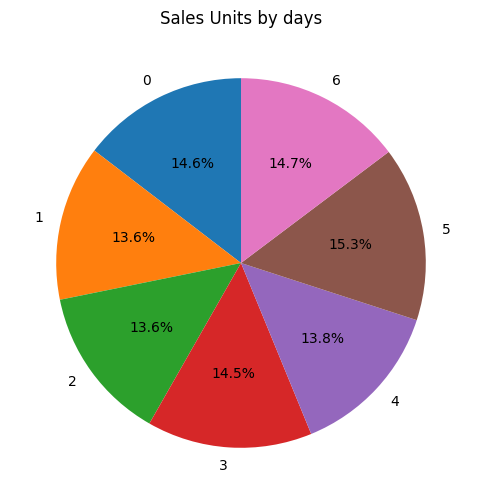

In [25]:
plt.figure(figsize=(6,6))
plt.pie(
    sales_by_day,
    labels=sales_by_day.index,
    autopct='%1.1f%%',
    startangle=90
)
plt.title("Sales Units by days")
plt.show()